In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset_path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/autos/autos.csv'
raw_dataset = pd.read_csv(dataset_path, na_values = "?")
dataset = raw_dataset.copy()
dataset.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [3]:
dataset = dataset.dropna()

In [4]:
len(dataset)

159

In [5]:
dataset.pop('make')
dataset.pop('fuel-type')
dataset.pop('aspiration')
dataset.pop('body-style')
dataset.pop('drive-wheels')
dataset.pop('engine-location')
dataset.pop('engine-type')
dataset.pop('fuel-system')
dataset.pop('num-of-doors')
dataset.pop('num-of-cylinders')

3      four
4      five
6      five
8      five
10     four
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 159, dtype: object

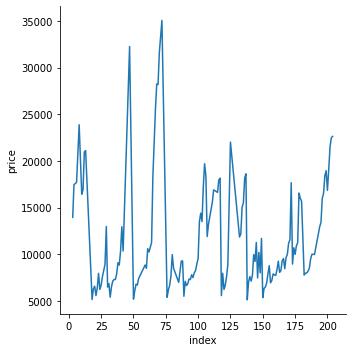

In [6]:
sns.relplot(x='index', y='price', kind='line', data=dataset.reset_index())

In [7]:
dataset.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [8]:
train_dataset = dataset.sample(n=80,random_state=10)
test_dataset = dataset.drop(train_dataset.index)

In [9]:
len(train_dataset)

80

In [10]:
len(test_dataset)

79

In [11]:
train_dataset.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,1,104.0,93.1,159.1,64.2,54.1,1905,91,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
119,1,119.0,93.7,157.3,63.8,50.8,2128,98,3.03,3.39,7.6,102.0,5500.0,24,30,7957.0
70,-1,93.0,115.6,202.6,71.7,56.3,3770,183,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
35,0,110.0,96.5,163.4,64.0,54.5,2010,92,2.91,3.41,9.2,76.0,6000.0,30,34,7295.0
170,2,134.0,98.4,176.2,65.6,52.0,2679,146,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0


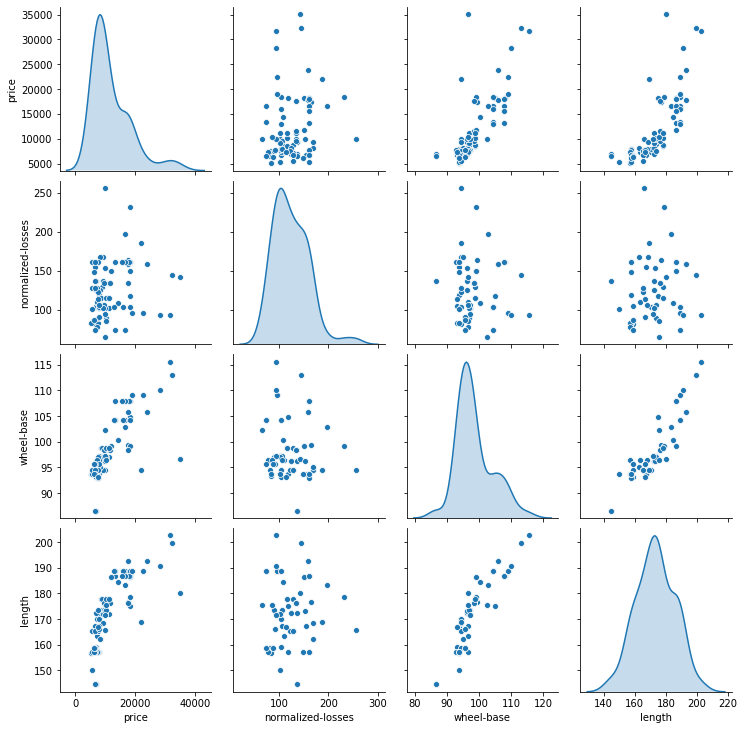

In [12]:
sns.pairplot(train_dataset[["price", "normalized-losses", "wheel-base", "length"]], diag_kind="kde")

In [13]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
symboling,80.0,0.712500,1.234460,-2.00,0.000,1.00,2.0000,3.00
normalized-losses,80.0,124.437500,35.495710,65.00,101.750,118.50,150.0000,256.00
wheel-base,80.0,98.631250,5.600059,86.60,94.500,97.00,100.9000,115.60
length,80.0,173.367500,12.277362,144.60,165.300,173.20,183.7750,202.60
width,80.0,65.850000,2.114866,62.50,63.975,65.40,67.2000,71.70
height,80.0,53.827500,2.158878,49.40,52.000,54.10,55.5500,58.70
curb-weight,80.0,2505.512500,520.401500,1713.00,2039.250,2385.00,2917.7500,4066.00
engine-size,80.0,122.175000,31.868708,79.00,97.000,115.00,141.0000,258.00
bore,80.0,3.347125,0.278291,2.91,3.150,3.34,3.6200,3.94
stroke,80.0,3.246375,0.309451,2.19,3.150,3.29,3.4225,4.17


In [14]:
def scale(x):
  return (x - train_stats['min']) / (train_stats['max'] - train_stats['min'])
scaled_train_data = scale(train_dataset)
scaled_test_data = scale(test_dataset)

In [15]:
scaled_train_data.tail()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
68,0.2,0.146597,0.806897,0.798276,0.847826,1.000000,0.865703,0.581006,0.650485,0.732323,0.906250,0.561983,0.081633,0.205882,0.194444,0.772597
132,1.0,0.445026,0.431034,0.724138,0.434783,0.720430,0.401615,0.234637,0.611650,0.444444,0.144375,0.454545,0.448980,0.176471,0.277778,0.224865
151,0.6,0.115183,0.313793,0.243103,0.119565,0.548387,0.138972,0.072626,0.135922,0.424242,0.125000,0.057851,0.265306,0.470588,0.555556,0.040751
64,0.4,0.261780,0.420690,0.572414,0.434783,0.655914,0.302592,0.240223,0.466019,0.606061,0.100000,0.239669,0.265306,0.323529,0.388889,0.204656
111,0.4,0.502618,0.734483,0.725862,0.641304,0.784946,0.578836,0.229050,0.533981,0.000000,0.087500,0.330579,0.346939,0.117647,0.166667,0.349456


In [16]:
train_labels = scaled_train_data.pop('price')
test_labels = scaled_test_data.pop('price')

In [17]:
def save(path):
    np.savetxt(path + 'X_train.csv', scaled_train_data)
    np.savetxt(path + 'X_test.csv', scaled_test_data)
    np.savetxt(path + 'Y_train.csv', train_labels)
    np.savetxt(path + 'Y_test.csv', test_labels)    

path = '/home/amanda/Dropbox/trabalho/testes/aplicacoes/autos/data/'
save(path)

path = '/home/amanda/Dropbox/trabalho/codigos/propostas/EVeP/data/autos/'
save(path)

# MLP Regressor

In [20]:
from sklearn.neural_network import MLPRegressor

# fit a CART model to the data
model = MLPRegressor()
model.fit(scaled_train_data, train_labels)

MLPRegressor()

In [33]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [21]:
# make predictions
expected_y  = test_labels
predicted_y = model.predict(scaled_test_data)

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(expected_y, predicted_y, squared=False)

0.08589233027634752

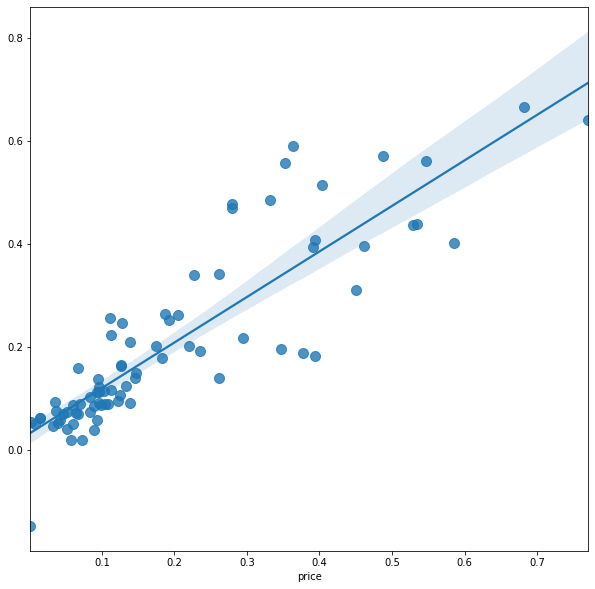

In [23]:
plt.figure(figsize=(10,10))     
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

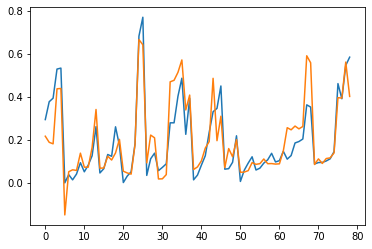

In [32]:
plt.plot(np.arange(expected_y.size), expected_y)
plt.plot(np.arange(expected_y.size), predicted_y)